In [194]:
#Import modules
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import itertools
%matplotlib inline  

In [195]:
#Function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [196]:
#Function to display metrics

def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict

# Data Analysis

In [197]:
#Read Data from url

data_file='https://raw.githubusercontent.com/varun-nallamothu/ArtificialIntelligence/main/heart_failure_clinical_records_dataset.csv'
heart_failure=pd.read_csv(data_file,sep=",")
heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [198]:
#Data Shape

heart_failure.shape

(299, 13)

In [199]:
#Checking Missing Data

heart_failure.isnull().values.sum()

0

In [200]:
#Checking type of data in each column

heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [201]:
#Describe data

heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


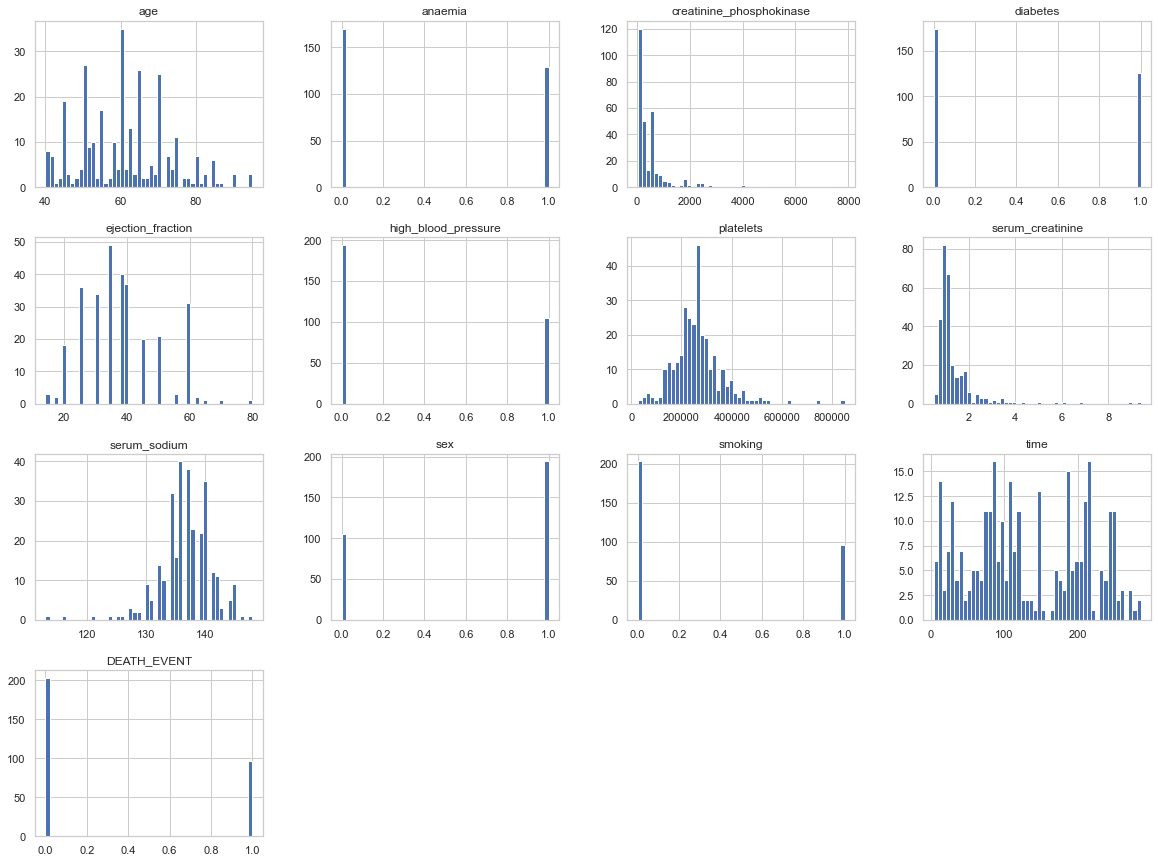

In [202]:
#Histogram of numerical features

heart_failure.hist(bins=50, figsize=(20,15))
plt.show()

In [205]:
#
resultNumber=heart_failure['DEATH_EVENT'].value_counts()
resultNumber

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [206]:
 #
(resultNumber[1]/resultNumber[0])*100

47.29064039408867

In [207]:
#Importing train_test_split data to the model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
print("imported train_test_split ")

imported train_test_split 


# Splitting data & Feature Scaling

In [208]:
X= heart_failure.drop("DEATH_EVENT", axis = 1)
print(X)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [209]:
y = heart_failure.DEATH_EVENT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3,random_state=0)
print('training data size:',X_train.shape[0])
print('testing data size:',X_test.shape[0])

training data size: 199
testing data size: 100


In [210]:
results_test_data={"KNN":[],"Logistic Regression":[],"SVM":[] }

# KNN Classifier

In [211]:
#Import Knn module
from sklearn.neighbors import KNeighborsClassifier
print('imported ')

imported 


In [246]:
k = 5
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
KNN

KNeighborsClassifier(algorithm='kd_tree')

In [260]:
startTime = time.time()

# this is where we train the model 
KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
print('The R-square is: ', KNN.score(X_train,y_train))

time: 0.001993894577026367  sec
The R-square is:  0.7587939698492462


In [248]:
startTime = time.time()

# this is where we make the prediction  
knn_prediction=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
knn_prediction[0:5]

time: 0.002988100051879883  sec


array([1, 1, 0, 0, 0], dtype=int64)

In [249]:
#Comparing the model accuracy with test data
np.mean(knn_prediction==y_test)

0.57

In [250]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print('imported ')

imported 


Confusion matrix, without normalization
[[47 22]
 [21 10]]


C:\Users\varun\AppData\Local\Temp\ipykernel_31296\3825493834.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


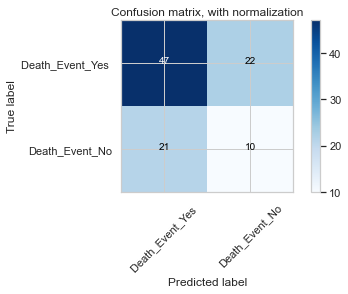

In [251]:
target_names = ['Death_Event_Yes ','Death_Event_No']
plot_confusion_matrix(confusion_matrix(knn_prediction,y_test), classes=target_names,title='Confusion matrix, with normalization')


In [252]:
from sklearn.metrics import precision_recall_fscore_support,recall_score,accuracy_score

In [253]:
prf1=precision_recall_fscore_support(y_test,knn_prediction)
acc=accuracy_score(y_test,knn_prediction)
acc

0.57

In [254]:
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.57
precision 0.3225806451612903
recall 0.3125
F1 0.3174603174603175


In [255]:
results_test_data['KNN']=metric['recall']
results_test_data['KNN']

0.3125

In [172]:
del KNN

# Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression

In [257]:
LR = LogisticRegression(C=0.01)
LR

LogisticRegression(C=0.01)

In [259]:
startTime=time.time()
# this is where we fit the model 
LR.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
print('The R-square is: ', LR.score(X_train,y_train))

time: 0.006974935531616211  sec
The R-square is:  0.8291457286432161


In [176]:
startTime=time.time()
# this is where we make the prediction  
lr_predection=LR.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
lr_predection[0:5]

lr_predection[0:5]

time: 0.001993417739868164  sec


array([0, 0, 1, 0, 0], dtype=int64)

In [232]:
np.mean(y_test==lr_predection)

0.81

# Grid Search

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
param_grid={'C':[0.001,0.01,0.1],'penalty':["l1", "l2"]}

In [235]:
grid = GridSearchCV(LogisticRegression(), cv=3, param_grid=param_grid,scoring="recall",n_jobs=-1)
print("Done")

Done


In [236]:
startTime=time.time()
# this is where we fit the model 
grid.fit(X_train,y_train)
lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

time: 3.853037118911743  sec


C:\Users\varun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\varun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\varun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\varun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueEr

In [237]:
grid.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [238]:
grid.best_score_

0.7027417027417027

In [239]:
LR=grid.best_estimator_
LR

LogisticRegression(C=0.001)

In [240]:
lr_predection=LR.predict(X_test)
lr_predection[0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [241]:
prf1=precision_recall_fscore_support(y_test,lr_predection)
acc=accuracy_score(y_test,lr_predection)
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)


accuracy 0.81
precision 0.8095238095238095
recall 0.53125
F1 0.6415094339622642


In [242]:
results_test_data['Logistic Regression']=metric['recall']
results_test_data

{'KNN': 0.28125, 'Logistic Regression': 0.53125, 'SVM': []}

Confusion matrix, without normalization
[[64 15]
 [ 4 17]]


C:\Users\varun\AppData\Local\Temp\ipykernel_31296\3825493834.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


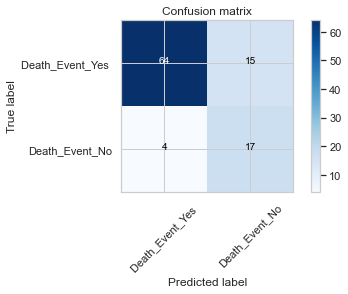

In [243]:
plot_confusion_matrix(confusion_matrix(lr_predection,y_test), classes=target_names,title='Confusion matrix')

In [244]:
del LR
del grid

In [245]:
results_test_data 

{'KNN': 0.28125, 'Logistic Regression': 0.53125, 'SVM': []}

In [261]:
#The model with the higher R-squared value is a better fit  
print('The R-square is: ', KNN.score(X_train,y_train))
print('The R-square is: ', LR.score(X_train,y_train))

The R-square is:  0.7587939698492462
The R-square is:  0.8291457286432161


In [263]:
plt.barb

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'